In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df_train = pd.read_csv('train_df.csv')
df_test = pd.read_csv('test_df.csv')


In [7]:
stl1 = STL(df_train["value"], period=24)
res1 = stl1.fit()
detrended1 = df_train["value"] - res1.seasonal


# 2. Sezonowość tygodniowa (168 godzin)
stl2 = STL(detrended1, period=168)
res2 = stl2.fit()

In [5]:
# model = SARIMAX(df_train['value'],
#                 order=(1, 0, 1),             # niesezonowa część
#                 seasonal_order=(2, 3, 1, 7*12) # sezonowa część: raz w roku (co 12 miesięcy)
#                )
model = ARIMA(endog=res2.trend+res2.resid,    
                order=(25, 0, 25),          # ARIMA: p=25  # sezonowość tygodniowa
                enforce_stationarity=False,
                enforce_invertibility=False
                )
model_fit = model.fit()

c:\Users\micha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 0.10
MAE: 2018.70
RMSE: 5430481.61


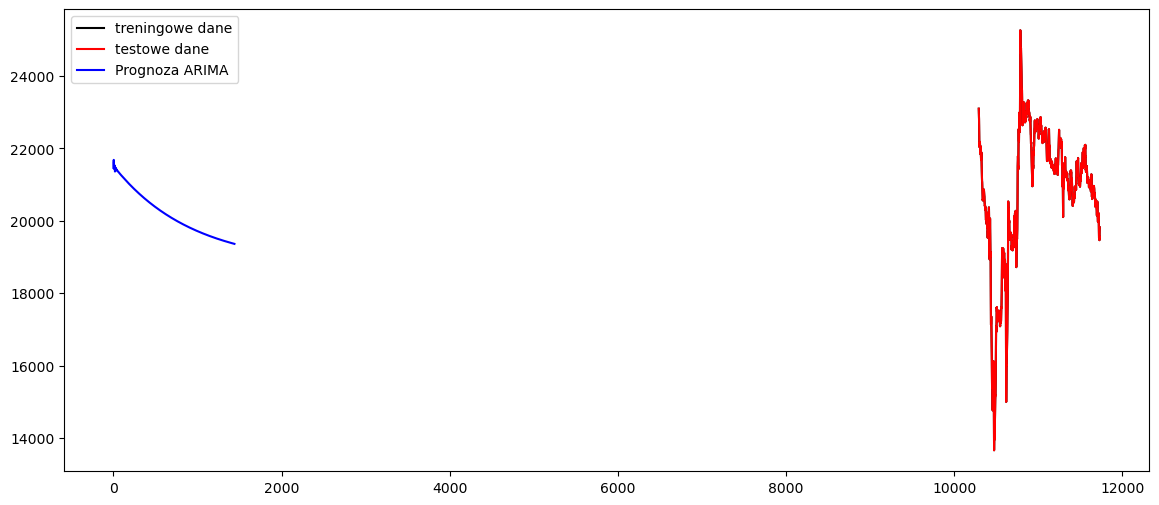

In [11]:
# Dopasuj model i prognozuj
forecast = model_fit.forecast(steps=len(res2.trend[-24*60:]+res2.resid[-24*60:]))

forecast.values
mape_value = mape(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
mae_value = mae(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
rmse_value = rmse(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)


plt.figure(figsize=(14, 6))
plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='treningowe dane', color='black')
plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='testowe dane', color='red')
plt.plot(forecast.values, label='Prognoza ARIMA', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")